In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [6]:
np.random.seed(42)

In [7]:
data = pd.read_csv('/kaggle/input/semiconductor-for-dsml/train.csv')

1_Basic Data Overview

In [9]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())
print("\nMissing Values:")
print(data.isnull().sum().sum(), "total missing values")

Dataset Shape: (21263, 82)

First 5 rows of the dataset:
   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   

2_Distribution of Target Variable

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


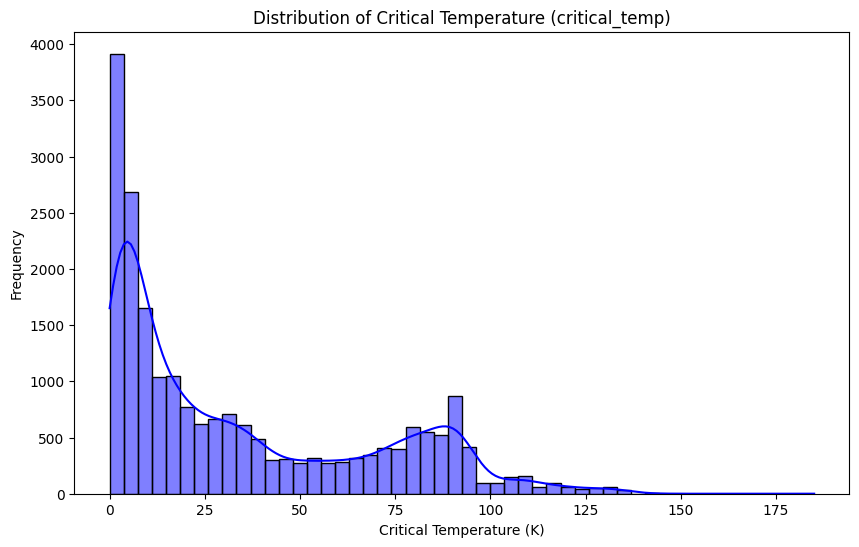

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['critical_temp'], bins=50, kde=True, color='blue')
plt.title('Distribution of Critical Temperature (critical_temp)')
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.show()

3_Statistical summary of critical_temp

In [11]:
print("\nCritical Temperature Summary:")
print(data['critical_temp'].describe())


Critical Temperature Summary:
count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64


4_Compute correlation with critical_temp

In [12]:
corr_with_target = data.corr()['critical_temp'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with critical_temp:")
print(corr_with_target.head(11))


Top 10 Features Correlated with critical_temp:
critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
wtd_entropy_atomic_mass        0.626930
wtd_entropy_atomic_radius      0.603494
number_of_elements             0.601069
range_fie                      0.600790
wtd_std_atomic_radius          0.599199
entropy_Valence                0.598591
Name: critical_temp, dtype: float64


Correlation heatmap for top correlated features

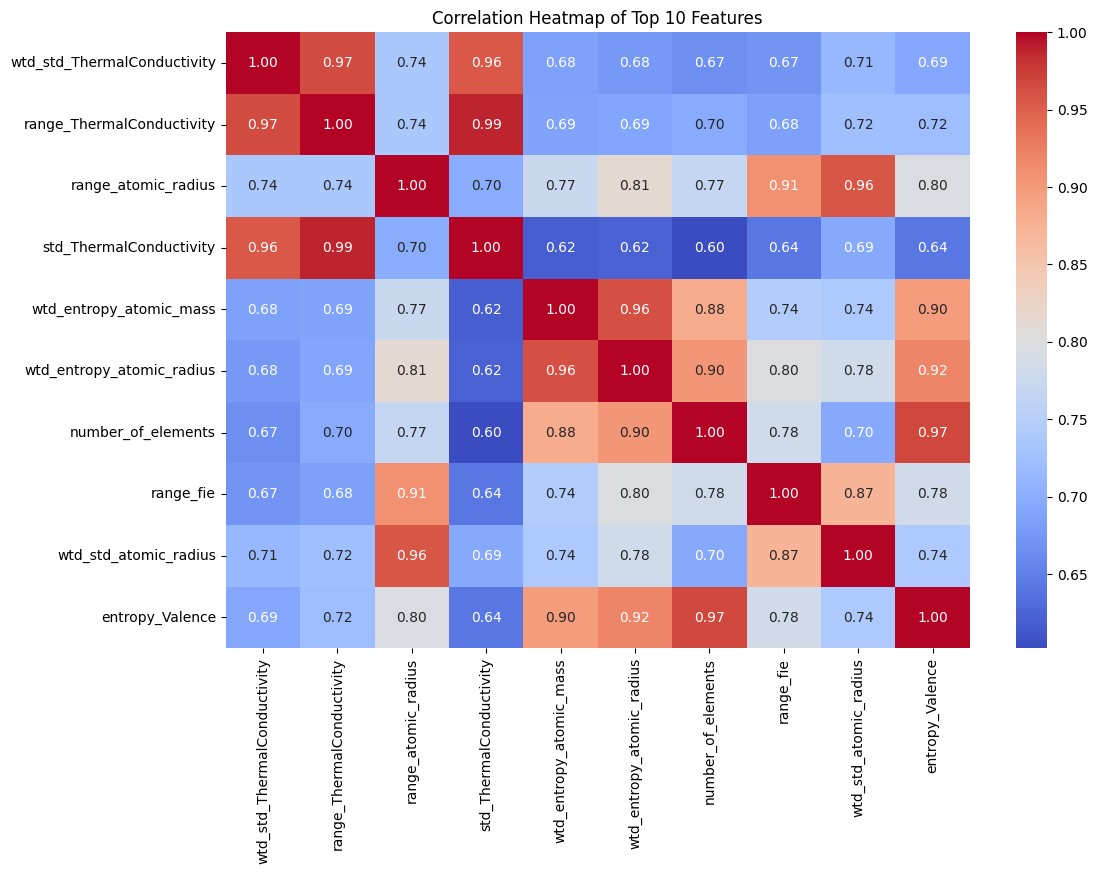

In [13]:
top_features = corr_with_target.index[1:11] 
plt.figure(figsize=(12, 8))
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 10 Features')
plt.show()

Scatter Plots for Key Features

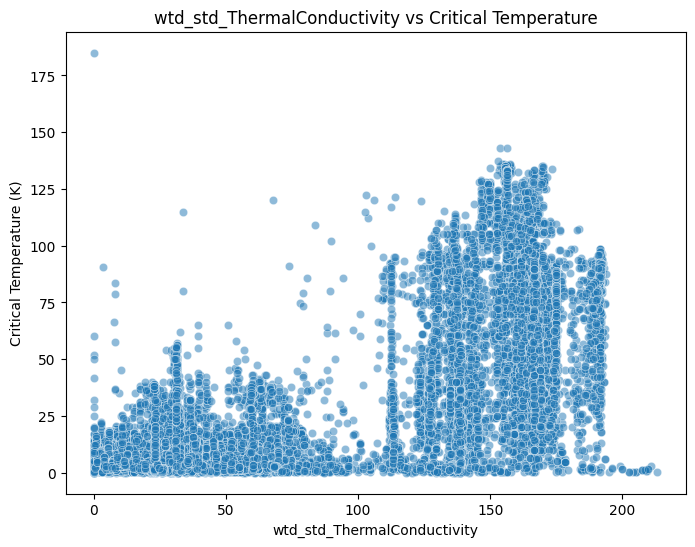

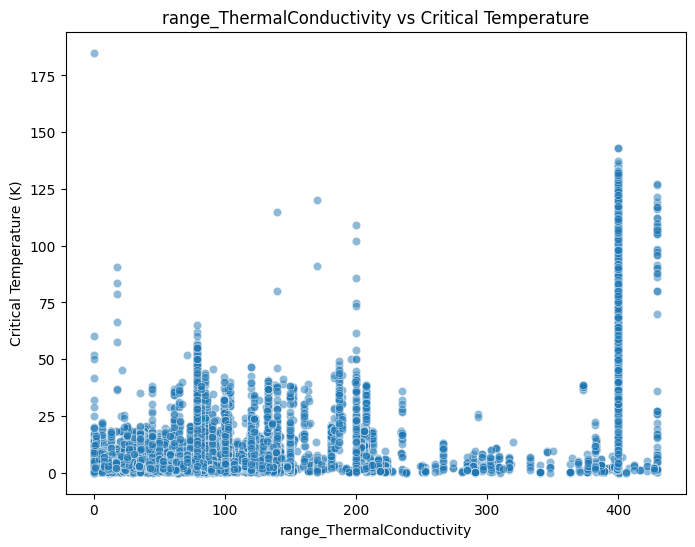

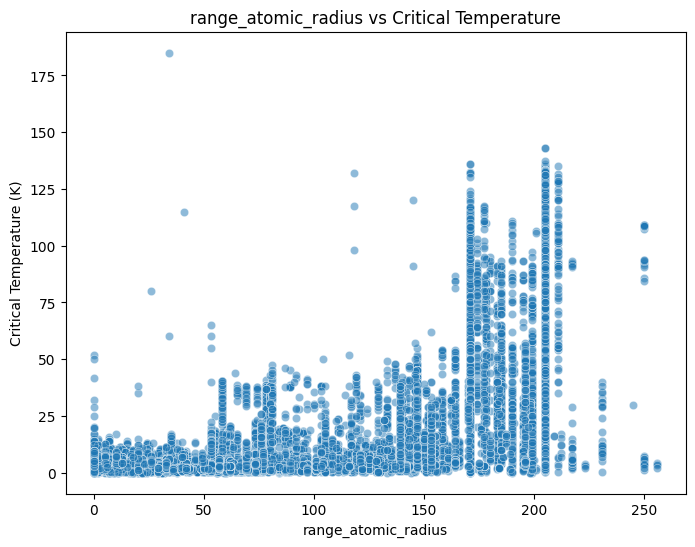

In [14]:
for feature in top_features[:3]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data['critical_temp'], alpha=0.5)
    plt.title(f'{feature} vs Critical Temperature')
    plt.xlabel(feature)
    plt.ylabel('Critical Temperature (K)')
    plt.show()

In [15]:
# Prepare data
X = data.drop('critical_temp', axis=1)
y = data['critical_temp']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Display top 10 important features
print("\nTop 10 Feature Importances from Random Forest:")
print(feature_importance.head(10))


Top 10 Feature Importances from Random Forest:
                            Feature  Importance
67        range_ThermalConductivity    0.536375
64    wtd_gmean_ThermalConductivity    0.126208
9                   std_atomic_mass    0.023052
74                wtd_gmean_Valence    0.019099
66  wtd_entropy_ThermalConductivity    0.012197
43           gmean_ElectronAffinity    0.011428
31                     mean_Density    0.011207
72                 wtd_mean_Valence    0.010848
39                      std_Density    0.010256
78                wtd_range_Valence    0.010100


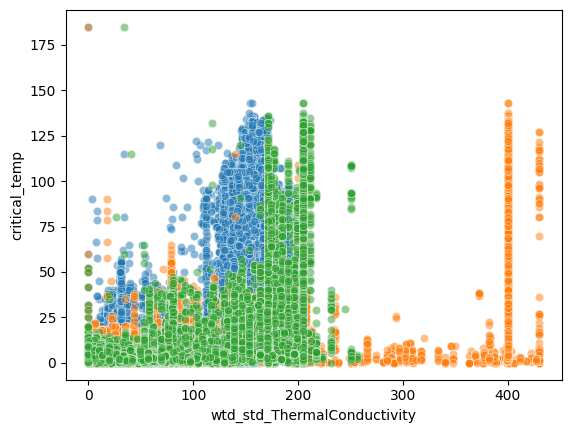

In [16]:
for feature in top_features[:3]:
    sns.scatterplot(x=data[feature], y=data['critical_temp'], alpha=0.5)